## Univariate and Multivariate Modeling and best fit - BASEBALL

### Create univariate linear regression to predict player salary

In [69]:
import pandas as pd
import numpy as np
# from scipy.stats import 
import matplotlib.pyplot as plt
from sklearn import linear_model

PLAYER_SALARY = './baseball_data/Salaries.csv'
BATTING_STUFF = './baseball_data/Batting.csv'
POST_FIELD = './baseball_data/FieldingPost.csv'
batting = pd.read_csv(BATTING_STUFF, sep=',')
salary = pd.read_csv(PLAYER_SALARY, sep=',')
field = pd.read_csv(POST_FIELD, sep=',')
salary_list = np.array(salary['salary'])
home_runs_list = np.array(batting['HR'])
year_list = np.array(salary['yearID'])
rbi_list = np.array(batting['RBI'])
error_list = np.array(field['E'])
field_list = np.array(field['InnOuts'])
field.head(5)

,playerID,yearID,teamID,lgID,round,POS,G,GS,InnOuts,PO,A,E,DP,TP,PB,SB,CS
0,colliji01,1903,BOS,AL,WS,3B,8,8,213.0,9,18,1,1,0,NaN,NaN,NaN
1,crigelo01,1903,BOS,AL,WS,C,8,8,213.0,54,7,3,2,0,0.0,9.0,3.0
2,dinnebi01,1903,BOS,AL,WS,P,4,4,105.0,2,9,0,0,0,NaN,6.0,1.0
3,doughpa01,1903,BOS,AL,WS,LF,8,8,213.0,13,3,1,1,0,NaN,NaN,NaN
4,ferriho01,1903,BOS,AL,WS,2B,8,8,213.0,18,23,2,2,0,NaN,NaN,NaN


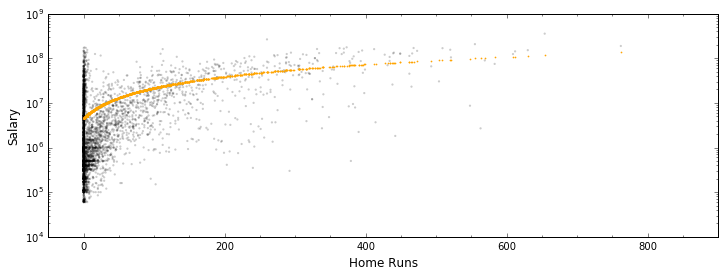

HR        2167
salary    2167
dtype: int64

In [70]:
%matplotlib inline
salary.head(1), batting.head(1)

total_salaries = salary.groupby(["playerID"])["salary"].sum()
total_hrs = batting.groupby(["playerID"])["HR"].sum()

all_stats = pd.concat((total_hrs, total_salaries), axis=1)
all_stats.dropna(inplace = True)

plt.figure(figsize=(12, 4))
plt.scatter(all_stats.HR, all_stats.salary, edgecolor="None",
            s=5, c='k', alpha=0.2)
plt.yscale("log")
plt.xlabel("Home Runs", fontsize=12); plt.ylabel("Salary", fontsize=12)
plt.minorticks_on()
plt.xlim(-50)

xvals = np.array(all_stats.HR)[:, np.newaxis]
yvals = np.array(all_stats.salary)
regressor = linear_model.LinearRegression()
regressor.fit(xvals, yvals)
plt.scatter(xvals, regressor.predict(xvals), s= .5, color = 'orange')

plt.show()
all_stats[all_stats.HR == 0].count()

In [71]:
from sklearn import cross_validation as cv
output = cv.KFold(len(all_stats), 10)

slopes, intercepts = [], []

for train_index, test_index in output:
    x_train, x_test = xvals[train_index], xvals[test_index]
    y_train, y_test = yvals[train_index], yvals[test_index]
    regressor.fit(x_train, y_train)
    slopes.append(regressor.coef_)
    intercepts.append(regressor.intercept_)
    
slope = np.mean(slopes)
intercept = np.mean(intercepts)

# regressor.coef_ = slope
# regressor.incept_ = intercept

print("Our model is:\n\tSalary = {} x N_HRs + {}".format(slope, intercept))

Our model is:
	Salary = 170662.04913058484 x N_HRs + 4510061.742907574


### This for loop divides our data into 10 sub-sections and performs a linear regression on each.  It then returns the average of the slopes of the regressions as well as the average of the intercepts.  These averages will be the m and y-intercept of our model, which we have now generalized by sampling 10 sub-groups.

## Starting Multivariant Linear Regression

In [72]:
total_post_field = field.groupby(["playerID"])["InnOuts"].sum()
total_rbi = batting.groupby(["playerID"])["RBI"].sum()
total_error = field.groupby(["playerID"])["E"].sum()
total_year = salary.groupby(["playerID"])["yearID"].sum()
all_stats = pd.concat((total_hrs, total_salaries, total_post_field, total_rbi, total_error, t), axis=1)
all_stats.dropna(inplace=True)
print(all_stats)

              HR       salary  InnOuts     RBI    E
aasedo01     0.0    2300000.0     15.0     0.0  0.0
abadfe01     0.0    1428900.0      1.0     0.0  0.0
abbotje01   18.0     985000.0      9.0    83.0  0.0
abbotku01   62.0    4237000.0    176.0   242.0  1.0
abbotpa01    0.0    6471000.0     56.0     2.0  0.0
abreubo01  288.0  124379666.0    465.0  1363.0  1.0
aceveal01    0.0    4285650.0     13.0     0.0  0.0
ackerji01    0.0    2985500.0     39.0     1.0  0.0
adamsma01   34.0    1006000.0    663.0   132.0  0.0
affelje01    0.0   36063000.0     94.0     2.0  0.0
agbaybe01   39.0    1280000.0    472.0   156.0  1.0
agostju01    0.0    4698334.0      1.0     0.0  0.0
aguilri01    3.0   32587999.0     72.0    11.0  0.0
albural01    0.0    1832500.0     24.0     0.0  0.0
aldremi01   41.0    2615000.0     57.0   271.0  0.0
alexado01    0.0    3725000.0     87.0    17.0  0.0
alexama02   15.0    2255500.0     28.0   115.0  0.0
alfonan01    0.0   15735000.0     43.0     2.0  0.0
alfoned01  1

In [73]:
# plt.figure(figsize=(12, 4))
# plt.scatter(all_stats.HR, all_stats.salary, edgecolor="None",
#             s=5, c='k', alpha=0.2)
# plt.yscale("log")
# plt.xlabel("Home Runs", fontsize=12); plt.ylabel("Salary", fontsize=12)
# plt.minorticks_on()
# plt.xlim(-50)

# plt.figure(figsize=(12, 4))
# plt.scatter(all_stats.InnOuts, all_stats.salary, edgecolor="None",
#             s=5, c='k', alpha=0.2)
# plt.yscale("log")
# plt.xlabel("Outs Played", fontsize=12); plt.ylabel("Salary", fontsize=12)
# plt.minorticks_on()
# plt.xlim(-50)

In [75]:
kfolds = cv.KFold(len(all_stats), 10)
regressor = linear_model.LinearRegression()
valid_data = ['HR', 'InnOuts', 'RBI', 'E']
xvals = np.array(all_stats[valid_data])
yvals = np.array(all_stats.salary)

coeffs, intercepts = [], []

for train_index, test_index in kfolds:
    x_train, x_test = xvals[train_index], xvals[test_index]
    y_train, y_test = yvals[train_index], yvals[test_index]
    regressor.fit(x_train, y_train)
    coeffs.append(regressor.coef_)
    intercepts.append(regressor.intercept_)
    
coeffs = np.array(coeffs).mean(axis=0) #averages each column
intercept = np.array(intercepts).mean(axis=0)    
    
regressor.coef_ = coeffs
regressor.intercept_ = intercept

print("Score: {0}".format(regressor.score(xvals, yvals)))

Score: 0.3334305538163292
